In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix,accuracy_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df_pl = pd.read_csv('../../../data/all_season/Liverpool_data_epl_match_details.csv')

In [3]:
df_ldc = pd.read_csv('../../../data/all_season/Liverpool_data_ldc_match_details.csv')

In [4]:
df_ldc = df_ldc.rename(columns={'Diff_elo':'Elo_Diff',
                               'elo_liverpool':'Elo_Liverpool',
                               'elo_opponent':'Elo_Opponent',
                               'liverpool_result':'liverpool_result_ft',
                               'rest_days' : 'Rest_Days'})

In [5]:
df = df_ldc.append(df_pl[df_ldc.columns])

In [6]:
df = df.reset_index(drop=True)

In [7]:
df['home_0_away_1'] = df['at_anfield'].apply(lambda x : 0 if x else 1)

In [8]:
df['Possession']=df['Possession'].str.replace('%','')
df['Possession']=df['Possession'].astype(int)

In [9]:
target = df['liverpool_result_ft']

# Scaled Data

In [24]:
all_features = df.drop(columns=['liverpool_result_ft','date_match','home_team','away_team','season','liverpool_score_ft','opponent_score_ft',
                               'Goals','Assists','Penalties scored','Penalties won','at_anfield','Formation','contests'])

In [25]:
all_features = all_features.drop(columns=['Possession','Shots On Target','Elo_Opponent','Elo_Liverpool','Balls touched'])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(all_features,target,test_size = 0.25)

In [27]:
x_train.columns

Index(['Shots', 'Saves', 'Crosses', 'Fouls', 'Offsides', 'Corners',
       'Yellow Card', 'Red Cards', 'Passes', 'Interceptions', 'Blocks',
       'Catches', 'Tackles', 'Rest_Days', 'Elo_Diff', 'home_0_away_1'],
      dtype='object')

In [28]:
col_scaler = StandardScaler()

In [29]:
x_scale = col_scaler.fit_transform(x_train)

In [30]:
y_scale = col_scaler.fit_transform(x_test)

In [31]:
model = SVC(kernel='linear',C=3,degree=3)

In [32]:
model.fit(x_scale,y_train)

SVC(C=3, kernel='linear')

In [33]:
model.score(y_scale,y_test)

0.6436781609195402

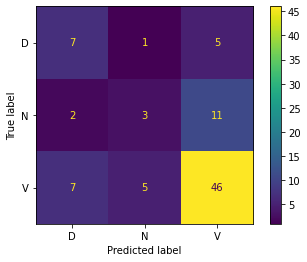

In [34]:
plot_confusion_matrix(model,y_scale,y_test)
plt.show()

In [70]:
f1_score(y_test,model.predict(x_test),average='micro')

0.6091954022988506

In [30]:
params = {'C':list(range(1,6)),
         'degree':[3,4,5],
         'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}

In [31]:
gs = GridSearchCV(model,params,cv=5,return_train_score=False)

In [ ]:
gs.fit(x_train,y_train)

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')

# Non Scaled Data

In [10]:
all_features = df.drop(columns=['liverpool_result_ft','date_match','home_team','away_team','season','liverpool_score_ft','opponent_score_ft',
                               'Goals','Assists','Penalties scored','Penalties won','at_anfield','Formation','contests'])

In [11]:
all_features = all_features.drop(columns=['Possession','Shots On Target','Elo_Opponent','Elo_Liverpool','Balls touched'])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(all_features,target,test_size = 0.25)

In [13]:
model = SVC()

In [15]:
params = {'C':list(range(1,2)),
         'degree':[3,4,5],
         'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}

In [16]:
gs = GridSearchCV(model,params,cv=5,return_train_score=False)

In [17]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [18]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.006248,0.007653,0.000000,0.000000,1,3,poly,"{'C': 1, 'degree': 3, 'kernel': 'poly'}",0.596154,0.615385,0.576923,0.576923,0.588235,0.590724,0.014316,1
5,0.009375,0.007655,0.000000,0.000000,1,4,poly,"{'C': 1, 'degree': 4, 'kernel': 'poly'}",0.596154,0.615385,0.576923,0.576923,0.588235,0.590724,0.014316,1
0,6.564887,2.398340,0.006252,0.007657,1,3,linear,"{'C': 1, 'degree': 3, 'kernel': 'linear'}",0.538462,0.673077,0.557692,0.615385,0.568627,0.590649,0.048375,3
4,6.728543,2.469953,0.003086,0.006171,1,4,linear,"{'C': 1, 'degree': 4, 'kernel': 'linear'}",0.538462,0.673077,0.557692,0.615385,0.568627,0.590649,0.048375,3
8,6.662832,2.479206,0.003728,0.006068,1,5,linear,"{'C': 1, 'degree': 5, 'kernel': 'linear'}",0.538462,0.673077,0.557692,0.615385,0.568627,0.590649,0.048375,3
9,0.006250,0.007654,0.000000,0.000000,1,5,poly,"{'C': 1, 'degree': 5, 'kernel': 'poly'}",0.596154,0.596154,0.576923,0.576923,0.588235,0.586878,0.008627,6
2,0.003126,0.006251,0.000000,0.000000,1,3,rbf,"{'C': 1, 'degree': 3, 'kernel': 'rbf'}",0.596154,0.576923,0.576923,0.576923,0.588235,0.583032,0.007889,7
6,0.003126,0.006252,0.003125,0.006249,1,4,rbf,"{'C': 1, 'degree': 4, 'kernel': 'rbf'}",0.596154,0.576923,0.576923,0.576923,0.588235,0.583032,0.007889,7
10,0.006254,0.007660,0.000000,0.000000,1,5,rbf,"{'C': 1, 'degree': 5, 'kernel': 'rbf'}",0.596154,0.576923,0.576923,0.576923,0.588235,0.583032,0.007889,7
3,0.003125,0.006251,0.003125,0.006250,1,3,sigmoid,"{'C': 1, 'degree': 3, 'kernel': 'sigmoid'}",0.557692,0.461538,0.423077,0.576923,0.470588,0.497964,0.059138,10


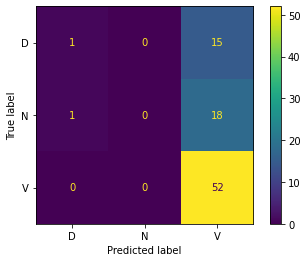

In [20]:
plot_confusion_matrix(gs.best_estimator_,x_test,y_test)
plt.show()

In [22]:
f1_score(y_test,gs.best_estimator_.predict(x_test),average='micro')

0.6091954022988506

In [25]:
print(classification_report(y_test, gs.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           D       0.50      0.06      0.11        16
           N       0.00      0.00      0.00        19
           V       0.61      1.00      0.76        52

    accuracy                           0.61        87
   macro avg       0.37      0.35      0.29        87
weighted avg       0.46      0.61      0.47        87



c:\users\ibrah\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
